## Final Project Charts

### Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import geopandas as gpd

In [2]:
username = 'lmd003' # your username
api_key = 'ZdD5zrT748FuJscu6VOb' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

### Attempt #1: Pokemon

In [3]:
pokemon =pd.read_csv('pokemon.csv')

In [4]:
pd.Series(pokemon.columns).head()

0           abilities
1         against_bug
2        against_dark
3      against_dragon
4    against_electric
dtype: object

In [5]:
pokemon[['name','generation','classfication','pokedex_number']].head()

name  generation   classfication  pokedex_number
0   Bulbasaur           1    Seed Pokémon               1
1     Ivysaur           1    Seed Pokémon               2
2    Venusaur           1    Seed Pokémon               3
3  Charmander           1  Lizard Pokémon               4
4  Charmeleon           1   Flame Pokémon               5

In [6]:
pokemon[pokemon['pokedex_number'] == 643]

abilities  against_bug  against_dark  against_dragon  \
642  ['Turboblaze']          0.5           1.0             2.0   

     against_electric  against_fairy  against_fight  against_fire  \
642               0.5            1.0            1.0          0.25   

     against_flying  against_ghost      ...       percentage_male  \
642             1.0            1.0      ...                   NaN   

     pokedex_number  sp_attack  sp_defense  speed   type1  type2  weight_kg  \
642             643        150         120     90  dragon   fire      330.0   

     generation  is_legendary  
642           5             1  

[1 rows x 41 columns]

### Attempt #2: Homelessness in San Diego

In [171]:
db = pd.read_csv('downtown_blocks.csv')
hc = pd.read_csv('homeless_counts.csv')
ic = pd.read_csv('imputed_counts.csv')
mt = pd.read_csv('monthly_totals.csv')
nt = pd.read_csv('neighborhood_totals.csv')

In [174]:
display(db.head(),hc.head(), ic.head(),mt.head(), nt.head())
print(len(db),len(hc), len(ic),len(mt), len(nt))

statefp10  countyfp10  tractce10  blockce10                 geoid10  \
0          6          73       5400       4017  10100US060730054004017   
1          6          73       5600       1016  10100US060730056001016   
2          6          73       5600       2060  10100US060730056002060   
3          6          73       5600       1017  10100US060730056001017   
4          6          73       5400       4023  10100US060730054004023   

       name10 mtfcc10  ur10  uace10 funcstat10  aland10  awater10  intptlat10  \
0  Block 4017   G5040   NaN     NaN          S     6516         0   32.710780   
1  Block 1016   G5040   NaN     NaN          S     5342         0   32.722268   
2  Block 2060   G5040   NaN     NaN          S    10048         0   32.720414   
3  Block 1017   G5040   NaN     NaN          S     6551         0   32.722322   
4  Block 4023   G5040   NaN     NaN          S     9992         0   32.708872   

   intptlon10                                           geometry  
0 -117.156928  POLYGON ((-117.157385 32.710435, -117.157386 3...  
1 -117.161597  POLYGON ((-117.162046 32.722574, -117.161865 3...  
2 -117.158836  POLYGON ((-117.15837 32.719891, -117.158555 32...  
3 -117.162519  POLYGON ((-117.162958 32.722759, -117.162775 3...  
4 -117.156907  POLYGON ((-117.156448 32.708344, -117.157356 3...

neighborhood        date        type  temp rain                   geoid  \
0  east_village  2014-01-01  individual   NaN  NaN  10100US060730052002017   
1  east_village  2014-01-01  individual   NaN  NaN  10100US060730052002017   
2  east_village  2014-01-01  individual   NaN  NaN  10100US060730052002017   
3  east_village  2014-01-01  individual   NaN  NaN  10100US060730052002017   
4  east_village  2014-01-01  individual   NaN  NaN  10100US060730052002017   

              x             y  \
0  6.283584e+06  1.840917e+06   
1  6.283584e+06  1.840917e+06   
2  6.283584e+06  1.840917e+06   
3  6.283584e+06  1.840917e+06   
4  6.283584e+06  1.840917e+06   

                                            geometry  
0  POLYGON ((-117.153825 32.714699, -117.153815 3...  
1  POLYGON ((-117.153825 32.714699, -117.153815 3...  
2  POLYGON ((-117.153825 32.714699, -117.153815 3...  
3  POLYGON ((-117.153825 32.714699, -117.153815 3...  
4  POLYGON ((-117.153825 32.714699, -117.153815 3...

neighborhood                 date        type  temp rain  \
0  east_village  2014-01-01 00:00:00  individual   NaN  NaN   
1  east_village  2014-01-01 00:00:00  individual   NaN  NaN   
2  east_village  2014-01-01 00:00:00  individual   NaN  NaN   
3  east_village  2014-01-01 00:00:00  individual   NaN  NaN   
4  east_village  2014-01-01 00:00:00  individual   NaN  NaN   

                    geoid             x             y  \
0  10100US060730052002017  6.283584e+06  1.840917e+06   
1  10100US060730051002019  6.284054e+06  1.838650e+06   
2  10100US060730052002016  6.283742e+06  1.840920e+06   
3  10100US060730052002016  6.283742e+06  1.840920e+06   
4  10100US060730052002016  6.283742e+06  1.840920e+06   

                                            geometry  
0  POLYGON ((-117.153825 32.714699, -117.153815 3...  
1  POLYGON ((-117.151883 32.708372, -117.151882 3...  
2  POLYGON ((-117.153778 32.714699, -117.153761 3...  
3  POLYGON ((-117.153778 32.714699, -117.153761 3...  
4  POLYGON ((-117.153778 32.714699, -117.153761 3...

date  count
0  2012-01-01    486
1  2012-02-01    485
2  2012-03-01    405
3  2012-04-01    453
4  2012-05-01    513

date  east_village  city_center  columbia  marina  cortez  gaslamp
0  2018-01-01           495          123        50      31      61       44
1  2018-02-01           474          156        58      34      56       84
2  2018-03-01           594          128        61      32      72       93
3  2018-04-01           502          111        46      37      44       51
4  2018-05-01           523          180        46      35      52       68

287 39202 41166 88 16


In [5]:
ic.type.value_counts()

individual    38931
structure      2050
vehicle         185
Name: type, dtype: int64

In [151]:
mt.date = pd.to_datetime(mt.date)
mt['year'] = mt.date.apply(lambda x: x.year)
mt['month'] = mt.date.apply(lambda x: x.month)
display(mt.head())
fig = px.bar(mt, x = 'year', y = 'count', color = 'month' ,title = 'Homeless people by year')
fig.show()

date  count  year  month
0 2012-01-01    486  2012      1
1 2012-02-01    485  2012      2
2 2012-03-01    405  2012      3
3 2012-04-01    453  2012      4
4 2012-05-01    513  2012      5

In [152]:
display(mt.groupby('year')['count'].sum().reset_index())
mean_table = mt.groupby('year')['count'].mean().reset_index()
mean_table

year  count
0  2012   6980
1  2013   6580
2  2014   7275
3  2015   8564
4  2016  12875
5  2017  12691
6  2018  10121
7  2019   3205

year        count
0  2012   581.666667
1  2013   548.333333
2  2014   606.250000
3  2015   713.666667
4  2016  1072.916667
5  2017  1057.583333
6  2018   843.416667
7  2019   801.250000

In [153]:
print(mean_table[mean_table["year"]==2016]["count"].values[0]-mean_table[mean_table["year"]==2012]["count"].values[0])
print(mean_table[mean_table["year"]==2019]["count"].values[0]-mean_table[mean_table["year"]==2017]["count"].values[0])

491.2500000000001
-256.33333333333326


In [154]:
pd.Series(mean_table['count'])

0     581.666667
1     548.333333
2     606.250000
3     713.666667
4    1072.916667
5    1057.583333
6     843.416667
7     801.250000
Name: count, dtype: float64

In [155]:
fig = px.bar(mt, x = 'date', y = 'count', color = 'month')
fig.show()

In [156]:
fig = px.line(mt, x = 'date', y = 'count'
            )
fig.show()

In [157]:
#py.plot(fig, filename = 'basic_line', auto_open=True)
tls.get_embed('https://plot.ly/~lmd003/21/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lmd003/21.embed" height="525" width="100%"></iframe>'

In [158]:
print("hc:",len(hc),"ic:",len(ic))

hc: 39202 ic: 41166


In [159]:
nt.date = pd.to_datetime(mt.date)
nt['year'] = mt.date.apply(lambda x: x.year)
nt['month'] = mt.date.apply(lambda x: x.month)
display(nt.head())

date  east_village  city_center  columbia  marina  cortez  gaslamp  \
0 2012-01-01           495          123        50      31      61       44   
1 2012-02-01           474          156        58      34      56       84   
2 2012-03-01           594          128        61      32      72       93   
3 2012-04-01           502          111        46      37      44       51   
4 2012-05-01           523          180        46      35      52       68   

   year  month  
0  2012      1  
1  2012      2  
2  2012      3  
3  2012      4  
4  2012      5

In [160]:
#nt.to_csv('nt.csv')
d = []
for i in nt[nt.year != 2013].drop(['date', 'year', 'month'], axis =1).columns:
    k = 1
    for j in list(nt[nt.year != 2013][i]):
        d.append([i]+[j] +[k])
        k+=1

In [10]:
test = pd.DataFrame(d)
test.columns = ['neighborhood', 'count', 'month']
display(test.head())
fig = px.scatter(test, x="month", y="count",color="neighborhood",
            size = 'count', size_max=60)
fig.show()

neighborhood  count  month
0  east_village    495      1
1  east_village    474      2
2  east_village    594      3
3  east_village    502      4
4  east_village    523      5

In [240]:
#py.plot(fig, filename = 'bubbles', auto_open=True)
tls.get_embed('https://plot.ly/~lmd003/17/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lmd003/17.embed" height="525" width="100%"></iframe>'

In [175]:
ic.date = pd.to_datetime(ic.date)
ic['year'] = ic.date.apply(lambda x: x.year)
ic['month'] = ic.date.apply(lambda x: x.month)
display(ic.head())
fig = px.density_heatmap(ic, x="year", y="neighborhood", marginal_x="rug", marginal_y="histogram"
                        )
fig.show()

neighborhood       date        type  temp rain                   geoid  \
0  east_village 2014-01-01  individual   NaN  NaN  10100US060730052002017   
1  east_village 2014-01-01  individual   NaN  NaN  10100US060730051002019   
2  east_village 2014-01-01  individual   NaN  NaN  10100US060730052002016   
3  east_village 2014-01-01  individual   NaN  NaN  10100US060730052002016   
4  east_village 2014-01-01  individual   NaN  NaN  10100US060730052002016   

              x             y  \
0  6.283584e+06  1.840917e+06   
1  6.284054e+06  1.838650e+06   
2  6.283742e+06  1.840920e+06   
3  6.283742e+06  1.840920e+06   
4  6.283742e+06  1.840920e+06   

                                            geometry  year  month  
0  POLYGON ((-117.153825 32.714699, -117.153815 3...  2014      1  
1  POLYGON ((-117.151883 32.708372, -117.151882 3...  2014      1  
2  POLYGON ((-117.153778 32.714699, -117.153761 3...  2014      1  
3  POLYGON ((-117.153778 32.714699, -117.153761 3...  2014      1  
4  POLYGON ((-117.153778 32.714699, -117.153761 3...  2014      1

In [182]:
type_df = ic.groupby(['year','type']).count().reset_index()[['year', 'type','x']]
type_df.columns = ['year', 'type','count']
type_df

year        type  count
0   2014  individual   7013
1   2014   structure     59
2   2014     vehicle      4
3   2015  individual   8505
4   2015   structure     23
5   2016  individual  12827
6   2016   structure     23
7   2017  individual   9382
8   2017   structure   1717
9   2017     vehicle    146
10  2018  individual   1204
11  2018   structure    228
12  2018     vehicle     35

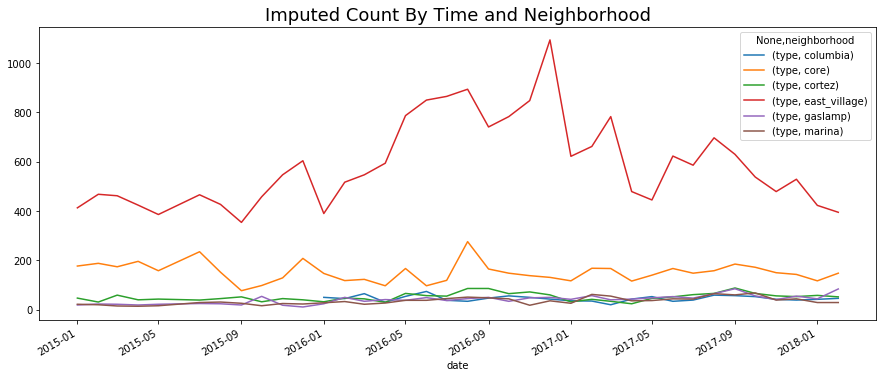

In [19]:
hc['date'] = pd.to_datetime(hc.date)
t = hc.set_index('date').groupby([pd.Grouper(freq="MS"), 'neighborhood']).type.count().to_frame()
ax = t.unstack().loc['2015':'2018-02-01'].plot(figsize=(15,6));
ax.set_title('Imputed Count By Time and Neighborhood', fontsize=18);

In [55]:
a = t.unstack().loc['2015':'2018-02-01'].stack().reset_index()
px.line(a,x='date', y = 'type', color = 'neighborhood', title = 'Imputed Count By Time and Neighborhood')

In [56]:
#py.plot(fig, filename = 'line_by_type_and_date', auto_open=True)
tls.get_embed('https://plot.ly/~lmd003/17/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lmd003/17.embed" height="525" width="100%"></iframe>'

In [142]:
import shapely.wkt
lst = []
for i in ic.geometry:
    lst.append(shapely.wkt.loads(i))
ic['geo'] = pd.Series(lst)
gdf = gpd.GeoDataFrame(
    ic, geometry = 'geo')

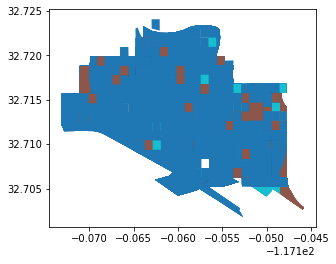

In [161]:
import matplotlib.pyplot as plt

new_map = gdf.plot(column = 'neighborhood')
plt.show()

In [162]:
gdf2 = gpd.GeoDataFrame(
    ic, geometry=gpd.points_from_xy(ic.x, ic.y))


In [166]:
gdf2.crs = {'init': 'epsg:2230'}
gdf2 = gdf2.to_crs({'init': 'epsg:4326'})

/home/lmd003/.local/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



In [272]:
a =gdf2.geometry.astype(str).str.strip("POINT ()").str.split()
ic['long']=a.apply(lambda x: x[0]).astype(float)
ic['lat']=a.apply(lambda x: x[1]).astype(float)    
fig = px.choropleth(db, lat = 'intptlat10',lon='intptlon10')
fig.show()

ValueError: Invalid properties specified for object of type plotly.graph_objs.Choropleth: ('lat', 'lon')

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default  palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            plotly.graph_objects.choropleth.ColorBar instance or
            dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use`zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Greys,YlGnBu,Greens,YlOrR
            d,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,H
            ot,Blackbody,Earth,Electric,Viridis,Cividis.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        geo
            Sets a reference between this trace's geospatial
            coordinates and a geographic map. If "geo" (the default
            value), the geospatial coordinates refer to
            `layout.geo`. If "geo2", the geospatial coordinates
            refer to `layout.geo2`, and so on.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objects.choropleth.Hoverlabel instance or
            dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        locationmode
            Determines the set of locations used to match entries
            in `locations` to regions on the map.
        locations
            Sets the coordinates via location IDs or names. See
            `locationmode` for more info.
        locationssrc
            Sets the source reference on plot.ly for  locations .
        marker
            plotly.graph_objects.choropleth.Marker instance or dict
            with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on plot.ly for  meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        selected
            plotly.graph_objects.choropleth.Selected instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            plotly.graph_objects.choropleth.Stream instance or dict
            with compatible properties
        text
            Sets the text elements associated with each location.
        textsrc
            Sets the source reference on plot.ly for  text .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            plotly.graph_objects.choropleth.Unselected instance or
            dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        z
            Sets the color values.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax`  Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zsrc
            Sets the source reference on plot.ly for  z .
        

In [277]:
lst = []
for i in db.geometry:
    lst.append(shapely.wkt.loads(i))
db['geo'] = pd.Series(lst)
gdf3 = gpd.GeoDataFrame(
    db, geometry = 'geo')

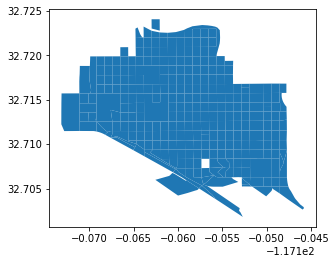

In [284]:
gdf3.plot()

In [292]:
zones = gpd.sjoin(gdf3, gdf2, how="inner", op='intersects')

zones.head()

/home/lmd003/.local/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning:

CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})



AttributeError: 'NoneType' object has no attribute 'intersection'

In [72]:
import metapack as mp
import matplotlib.pyplot as plt

pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-dowtown_homeless-9.zip')

pkg


# Downtown San Diego Homeless Sleepers
`sandiegodata.org-dowtown_homeless-9` Last Update: 2019-10-03T18:22:47

_Five years of monthly geographic positions for homeless sleepers in Downtown San Diego_


This dataset provides geographic locations for homeless sleepers in Downtown San Diego, as counted by enumerators from the Downtown San Diego Partnership. These counts have been done monthly since 2012, and this dataset provides counts since 2014. 

<center><a
href="https://data.sandiegodata.org/wp-content/uploads/sites/18/2019/10/Homeless
-Sleepers.png"><img
src="https://data.sandiegodata.org/wp-content/uploads/sites/18/2019/10/Homeless-
Sleepers.png" width="400px"></a></center>


The count is done on paper maps with handwritten count marks. The San Diego
Regional Data Library's [Downton Homelessness
project](http://downtown-homelessness.sandiegodata.org/) converted these
scanned count maps using a [web based image annotation
tool](http://www.robots.ox.ac.uk/~vgg/software/via/).

## Base and Imputed Datasets

This distribution has two version of the homeless counts, the base set,
``homeless_counts``, which has three months of missing data, and the imputed
dataset, ``imputed_counts`` in which these three missing months, 2014-08,
2014-09, and 2015-06 are probabilistically re-created.

The Imputation process uses the total count for the month, from the
``monthly_totals`` dataset, as the number of sleepers that the imputed month
will have. Then, the imputation process collects at least 1,000 records with
dates near the missing month into a sample set, calculating the portion of
records that are in each census block. Then the algorithm randomly selects that
number of records for each census block, and adjusts random blocks so the total
of the whole set of selected records is equal to the official count for the
month.

The result is an imputed month that has the same number of records as the
official count for the month and as the same portion of sleepers in each census
block as in adjacent months.

## Notes

Notes for the source dataset, as of April 2019:

The preliminary methodology (shown in yellow) [ March 2017 and earlier] counted
two individuals per tent and two individuals per vehicle.

On April 27, 2017, the Clean & Safe program adopted the counting methodology
used by the Regional Task Force on the Homeless. Per the methodology
(represented above by the dark green cells), [April 2017 to April 2018,
inclusive ] Clean & Safe staff counted 1.75 individuals per visible
tent/structure and 1.66 individuals per vehicle that showed clear signs of
habitation.

In May 2018, the Regional Task Force on the Homeless updated the methodology
for vehicles to 2.03 that shows clear signs of habitation (the methodology of
1.75 individuals per tent/structure remained the same). The Clean & Safe
program implemented this methodology on May 31, 2018 (represented in orange).

\* Denotes the months that The Downtown Fellowship of Ministries and Churches collaborated with us on the monthly homeless sleep count.

\*\*East Village breakout areas include the following:
    * North East East Village is the area north of Market Street & east of Park Ave. 
    * North West is the area north of Market Street & west of Park Ave.
    * South East is the area east of Park Ave. south of Market Street
    * South West is the area west of Park Ave. south of Market Street

## Caveats

Because this data is extracted, manually, from manually recorded maps, there
are a lot of quality issues. 

### Missing Months

Because of conversion errors and some complications with the source maps, there
are several months of data that are excluded from this dataset

* **August 2014**. In the original datasets, August 2014 was a duplicate of September 2014. 
* **September 2014**. Comfusion related to the duplication of September and August resulted in September being incompletely processed. 
* **June 2015**. All of the map images for this month were blank. An alternate source PDF

In [65]:
blocks = pkg.resource('downtown_blocks').geoframe().rename(columns={'geoid10':'geoid'})
blocks = blocks[['geoid', 'geometry']]

In [85]:
mt = pkg.resource('monthly_totals').dataframe()
hc = pkg.resource('homeless_counts').dataframe()
hc['records'] = 1

ic = pkg.resource('imputed_counts').geoframe()
ic['records'] = 1

t =  blocks.merge(ic[['geoid', 'records']], on='geoid').rename(columns={'records':'sleepers'})
hc_blocks = t.groupby('geoid').count().sleepers.to_frame()


        
df = blocks.merge(hc_blocks, on='geoid', how='left')

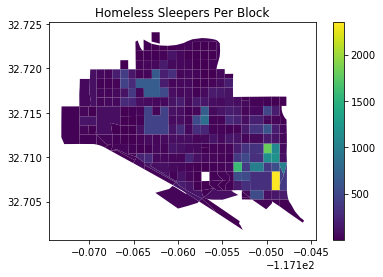

In [109]:
gdf = gpd.GeoDataFrame(
    df, geometry = 'geometry')
ax = gdf.plot(column = 'sleepers', legend = True)
ax.set_title("Homeless Sleepers Per Block");


/home/lmd003/.local/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

/home/lmd003/.local/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



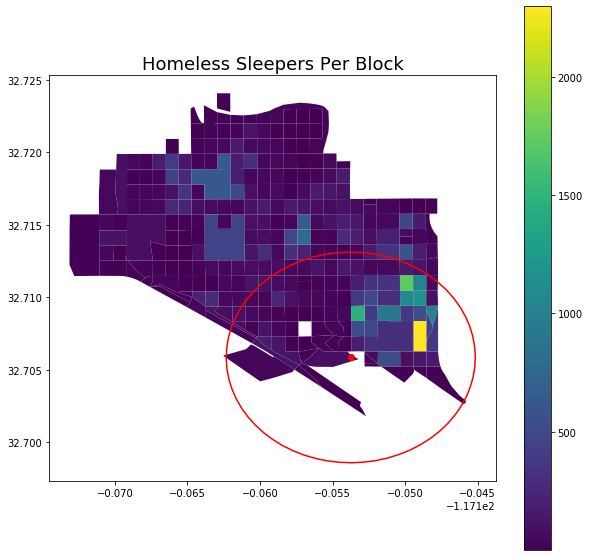

In [99]:

from shapely.geometry import Point

pt = gpd.GeoDataFrame([[Point(-117.1537487,32.705857)]], columns=['geometry'], geometry='geometry', crs={'init': 'epsg:4326'})

# Buffer point. Convert CRS to do the buffering in feet
pt_1000 =  gpd.GeoDataFrame({'geometry':pt.to_crs({'init':'epsg:2230'}).buffer(5280/2).to_crs({'init':'epsg:4326'})}, crs={'init': 'epsg:4326'})

j = blocks.merge(hc[['geoid','records']].groupby('geoid').agg({'records':'count'}).reset_index(), on='geoid')

ax = j.plot(column='records', figsize=(10,10), legend=True);

ax.set_title("Homeless Sleepers Per Block", fontsize=18);

pt_1000.geometry.boundary.plot(ax=ax, color='red')
pt.plot(ax=ax, color='red')

In [105]:
#gdf.to_file("result.shp")

date  count
0  2012-01-01    486
1  2012-02-01    485
2  2012-03-01    405
3  2012-04-01    453
4  2012-05-01    513
5  2012-06-01    502
6  2012-07-01    672
7  2012-08-01    623
8  2012-09-01    725
9  2012-10-01    887
10 2012-11-01    636
11 2012-12-01    593
12 2013-01-01    531
13 2013-02-01    568
14 2013-03-01    458
15 2013-04-01    509
16 2013-05-01    563
17 2013-06-01    599
18 2013-07-01    571
19 2013-08-01    619
20 2013-09-01    556
21 2013-10-01    541
22 2013-11-01    557
23 2013-12-01    508
24 2014-01-01    569
25 2014-02-01    568
26 2014-03-01    634
27 2014-04-01    585
28 2014-05-01    597
29 2014-06-01    662
..        ...    ...
58 2016-11-01   1170
59 2016-12-01   1415
60 2017-01-01    882
61 2017-02-01   1027
62 2017-03-01   1105
63 2017-04-01    875
64 2017-05-01    892
65 2017-06-01   1156
66 2017-07-01   1100
67 2017-08-01   1335
68 2017-09-01   1275
69 2017-10-01   1091
70 2017-11-01    941
71 2017-12-01   1012
72 2018-01-01    804
73 2018-02-01    862
74 2018-03-01    980
75 2018-04-01    791
76 2018-05-01    904
77 2018-06-01    759
78 2018-07-01    926
79 2018-08-01    964
80 2018-09-01    787
81 2018-10-01    739
82 2018-11-01    799
83 2018-12-01    806
84 2019-01-01    898
85 2019-02-01    799
86 2019-03-01    732
87 2019-04-01    776

[88 rows x 2 columns]